In [1]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices

%pylab inline
import re
import string

Populating the interactive namespace from numpy and matplotlib


In [6]:
#comments are coming in as utf-8 so I am using this code to change it back to ascii
def unicodetoascii(text):

    TEXT = (text.
    		replace('\xe2\x80\x99', "'").
            replace('\xc3\xa9', 'e').
            replace('\xe2\x80\x90', '-').
            replace('\xe2\x80\x91', '-').
            replace('\xe2\x80\x92', '-').
            replace('\xe2\x80\x93', '-').
            replace('\xe2\x80\x94', '-').
            replace('\xe2\x80\x94', '-').
            replace('\xe2\x80\x98', "'").
            replace('\xe2\x80\x9b', "'").
            replace('\xe2\x80\x9c', '"').
            replace('\xe2\x80\x9c', '"').
            replace('\xe2\x80\x9d', '"').
            replace('\xe2\x80\x9e', '"').
            replace('\xe2\x80\x9f', '"').
            replace('\xe2\x80\xa6', '...').#
            replace('\xe2\x80\xb2', "'").
            replace('\xe2\x80\xb3', "'").
            replace('\xe2\x80\xb4', "'").
            replace('\xe2\x80\xb5', "'").
            replace('\xe2\x80\xb6', "'").
            replace('\xe2\x80\xb7', "'").
            replace('\xe2\x81\xba', "+").
            replace('\xe2\x81\xbb', "-").
            replace('\xe2\x81\xbc', "=").
            replace('\xe2\x81\xbd', "(").
            replace('\xe2\x81\xbe', ")")

                 )
    return TEXT

In [7]:
data = pd.read_csv('final.csv', sep=',',names=['id', 'date','user','text'])

In [8]:
data.drop(data.index[:1], inplace=True)

In [9]:
data[:5]

,id,date,user,text
1,0.0,September 7,dino001,If they keep it around in next four-five years...
2,1.0,September 7,circlew,The lease rate is the factor that stops me col...
3,2.0,September 8,qbrozen,"Yes, the completely noncomparable M2 would bea..."
4,3.0,September 9,FlightNurse2,Why not a Genesis G70 with a manual?
5,4.0,September 9,roadburner,"Again, the local dealer are hopeless at best(W..."


In [36]:
#text field is the comments field
#unicodetoascii changes the form from unicoding to regular english
#making all the comments lower case
#dt = data.iloc[:50]
text = data['text']
text = text.map(lambda a: unicodetoascii(str(a)))
text = text.map(lambda a: a.lower())

#text= text.map(lambda a: str(a).decode('ascii', errors='ignore'))
#text_18 = text.loc[18]

#text_18 = text_18.decode("ascii", errors="ignore")
#text_18

In [37]:
models = pd.read_csv('models.csv', sep=',',names=['brand','model'],encoding='windows-1252')
models_revised = pd.read_csv('models_revised.csv', sep=',',names=['brand','model'],encoding='windows-1252')

In [38]:
#this text is also in unicode so just replacing one of the symbols with a space 
#(we can also call the unicodetoascii function here for more robust cleaning)
#making the model names lowercase
models.model = models['model'].map(lambda x: x.replace('\xa0', ''))
models.model = models['model'].map(lambda x: x.lower())
models_revised.model = models_revised['model'].map(lambda x: x.replace('\xa0', ''))
models_revised.model = models_revised['model'].map(lambda x: x.lower())

In [39]:
#create dictionary {model: brand}
#this will be used when locating when the model is written, and replacing it to the brand name
brand_dict = {}
for i in range(len(models_revised)):
    brand_dict[models_revised['model'][i]] = models_revised['brand'][i]

In [106]:
#replace all models with brand names


#for key in brand_dict.iterkeys():
 #   dt['text'] = dt['text'].map(lambda x: x.replace(key, brand_dict[key]))
    
#dt['text']
#for key in brand_dict.iterkeys():
#    text_18 = text_18.replace(key, brand_dict[key])
#text_18

def replace(match):
    return brand_dict[match.group(0)]

text = text.map(lambda x: re.sub(''.join(r'\b%s' % re.escape(s) for s in brand_dict), 
        replace, x) )

#text_18 =  re.sub('|'.join(r'\b%s' % re.escape(s) for s in brand_dict), 
#        replace, text_18) 

In [107]:
#finding all of the unique/different brand names
brand = list(set(models_revised.brand))

In [108]:
#findall: takes each comment separately, finds every time any brand is mentioned, and adds it to the master list
#set(ls): this makes sure that even if the brand is mentioned more than once, it is only recorded once
master_list = []

def findall(w):
    ls = []
    ls = [e for e in brand for i in w.split() if e in i] #this line finds where the brand is mentioned in the comment (could be
    # of any format: ex. "honda."| "honda's" | "honda-and" | etc., and records it as just "honda")
    ls = list(set(ls))
    master_list.append(ls) #this stores all the mentions of every comment we have
text.map(findall)

count_list = sum(master_list)

In [109]:
count_series = pd.Series(count_list).value_counts()
count_series[:10]

bmw           532
audi          457
toyota        231
acura         217
honda         205
volkswagen    131
infiniti      106
hyundai       103
cadillac       98
ford           97
dtype: int64

In [104]:
from collections import Counter
#counts the number of mentions each brand has and displays the top 10

counts = Counter(count_list)
counts.most_common(10)

[('bmw', 532),
 ('audi', 457),
 ('toyota', 231),
 ('acura', 217),
 ('honda', 205),
 ('volkswagen', 131),
 ('infiniti', 106),
 ('hyundai', 103),
 ('cadillac', 98),
 ('ford', 97)]

In [77]:
#list = []
#list = [i for e in brand for i in text_18.split() if e in i]
#for b in brand:
#    for c in list:
#        if re.search(b , c):
#            list = [word.replace(c,b) for word in list]
#set(list)

In [50]:
#def ratio(a, b):
#    a = float(a)
#    b = float(b)
#    if b == 0:
#        return a
#    return ratio(b, a % b)

#def get_ratio(a, b):
#    r = ratio(a, b)
#    return "%s" % float((a/r) / (b/r))

In [181]:
master_list = list(filter(None,master_list))

In [137]:
def co_occur(car1, car2):
    freq = 0
    for i in range(len(master_list)):
        if (car1 in master_list[i]) & (car2 in master_list[i]):
            freq += 1
    return freq

def lift(car1, car2):
    return (float(len(text)) * float(co_occur(car1, car2))) / (float(count_series.loc[car1]) * float(count_series.loc[car2]))

In [138]:
lift('bmw','audi')

2.012602622530067

In [182]:
top_10_brand = list(count_series[:10].index.values)


from itertools import combinations

for combo in combinations(list(count_series[:10].index.values), 2):
    print(combo,lift(combo[0],combo[1]))

('bmw', 'audi') 2.012602622530067
('bmw', 'toyota') 1.8249194414607948
('bmw', 'acura') 1.2803870274765254
('bmw', 'honda') 1.3553365120117367
('bmw', 'volkswagen') 0.8044969293462664
('bmw', 'infiniti') 1.4461625762519505
('bmw', 'hyundai') 1.7673370319001387
('bmw', 'cadillac') 1.8575072886297377
('bmw', 'ford') 1.4815711960313154
('audi', 'toyota') 1.8347210776094802
('audi', 'acura') 2.158678619326604
('audi', 'honda') 1.632171639003042
('audi', 'volkswagen') 3.746103863564234
('audi', 'infiniti') 4.313963089880682
('audi', 'hyundai') 1.732531707420705
('audi', 'cadillac') 2.0485419550752466
('audi', 'ford') 1.379773962868551
('toyota', 'acura') 1.6269076545574241
('toyota', 'honda') 3.9824516946468167
('toyota', 'volkswagen') 1.8527808069792802
('toyota', 'infiniti') 1.8734378828718452
('toyota', 'hyundai') 2.5706720464002015
('toyota', 'cadillac') 1.5760667903525047
('toyota', 'ford') 3.184629803186504
('acura', 'honda') 6.187209171630887
('acura', 'volkswagen') 1.255109578921448

In [220]:
dist_list = []
for car1 in top_10_brand:
    group_dist=[]
    for car2 in top_10_brand:
        if (lift(car1, car2) != 0) & (car1 != car2):
            group_dist.append(1/lift(car1, car2))
        elif (lift(car1, car2) != 0) & (car1 == car2):
            group_dist.append(0.0)
        else:
            group_dist.append(3.0)
    dist_list.append(group_dist)

C:\Users\b0130\Anaconda2\envs\py36\lib\site-packages\sklearn\manifold\mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


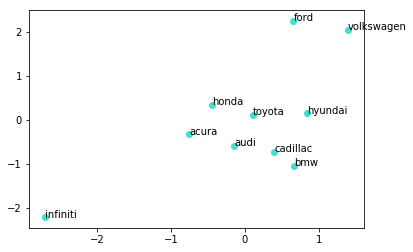

In [221]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

mds = MDS(n_components=2)
pos = mds.fit(dist_list).embedding_
fig, ax = plt.subplots()
ax.scatter(pos[:, 0], pos[:, 1], color='turquoise')
for i, txt in enumerate(top_10_brand):
    ax.annotate(txt, (pos[:, 0][i], pos[:, 1][i]))